## TIME SERIES ANALYSIS ON CORONAVIRUS FOR THE NETHERLANDS THROUGH DAILY UPDATED DATASET (LATEST VERSION - 07/IV)

In [131]:
import pandas as pd
import requests
import datetime
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#This part is for daily update the dataset.
today = datetime.now()
today = today.strftime('%Y-%m-%d')

yesterday = datetime.now() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')

try: 
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{today}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
    
except:    
    url=f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{yesterday}.xlsx'
    df = pd.read_excel(url, parse_date=[0],index_col=0)#Parsing date is for time series analysis  
    df_domain = pd.DataFrame(df)
        
print('Dataset is ready.')

#Data Wrangling
df_domain.columns = ['Day','Month','Year','Cases','Deaths','Countries and territories','Geold','Country_Code','Population','continent','cum num 14 days 100k']

df_domain.drop('Day',1,inplace=True)
df_domain.drop('Month',1,inplace=True)
df_domain.drop('Year',1,inplace=True)
df_domain.drop('Countries and territories',1,inplace=True)
df_domain.drop('Country_Code',1,inplace=True)
df_domain.drop('Population',1,inplace=True)
df_domain = df_domain[df_domain['Geold'] == 'NL']
df_domain.drop('Geold',1,inplace=True)
df_domain.drop('continent',1,inplace=True)
df_domain.drop('cum num 14 days 100k',1,inplace=True)
df_domain.drop(df_domain.tail(1).index,inplace=True) # drop last row 31-12-2019
#df_domain.set_index(pd.DatetimeIndex(df_domain['dateRep']), inplace=True)
df_domain.loc[:, 'Case_Fatality_Ratio'] =df_domain['Deaths']/df_domain.Cases
df_NL=df_domain
df_NL.head(10)


Dataset is ready.


,Cases,Deaths,Case_Fatality_Ratio
dateRep,,,
2020-07-17,99,1,0.010101
2020-07-16,106,0,0.000000
2020-07-15,53,0,0.000000
2020-07-14,71,0,0.000000
2020-07-13,101,0,0.000000
2020-07-12,81,0,0.000000
2020-07-11,42,0,0.000000
2020-07-10,52,1,0.019231
2020-07-09,52,3,0.057692


In [133]:
df_NL.tail(10)

,Cases,Deaths,Case_Fatality_Ratio
dateRep,,,
2020-01-10,0,0,NaN
2020-01-09,0,0,NaN
2020-01-08,0,0,NaN
2020-01-07,0,0,NaN
2020-01-06,0,0,NaN
2020-01-05,0,0,NaN
2020-01-04,0,0,NaN
2020-01-03,0,0,NaN
2020-01-02,0,0,NaN


In [134]:
type(df.index[0]) #Checking the dates whether they are timestamp or not.

pandas._libs.tslibs.timestamps.Timestamp

In [135]:
df_NL.shape

(199, 3)

In [136]:
df_NL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-07-17 to 2020-01-01
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cases                199 non-null    int64  
 1   Deaths               199 non-null    int64  
 2   Case_Fatality_Ratio  140 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.2 KB


In [137]:
df_NL.isnull().sum()

Cases                   0
Deaths                  0
Case_Fatality_Ratio    59
dtype: int64

In [138]:
df_NL.describe()

,Cases,Deaths,Case_Fatality_Ratio
count,199.000000,199.000000,140.000000
mean,257.768844,30.793970,0.087946
std,357.646808,50.356936,0.079442
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.023879
50%,103.000000,3.000000,0.075795
75%,298.000000,35.000000,0.133294
max,1335.000000,234.000000,0.375648


## General Trendline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37c29687f0>,
      dtype=object)

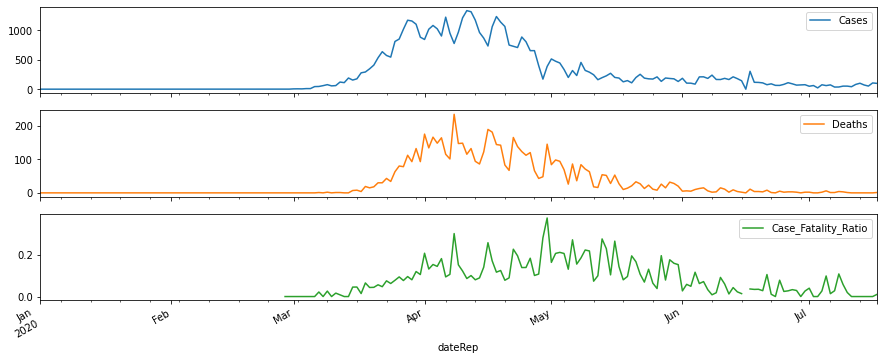

In [139]:
df_NL.plot(subplots=True, figsize=(15,6))

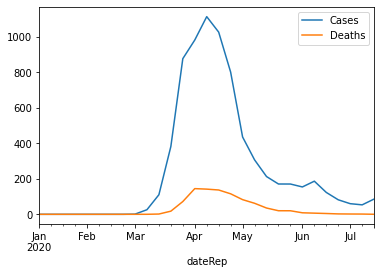

In [140]:
df_NL[['Cases','Deaths']].resample('W').mean().plot()

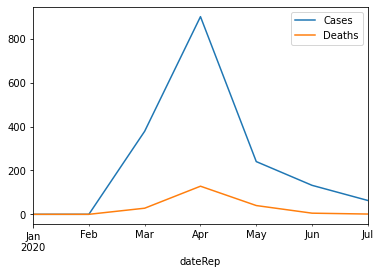

In [141]:
df_NL[['Cases','Deaths']].resample('M').mean().plot()

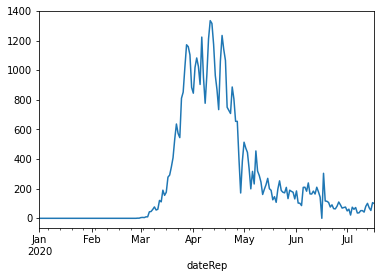

In [142]:
df_NL['Cases'].resample('D').mean().plot()

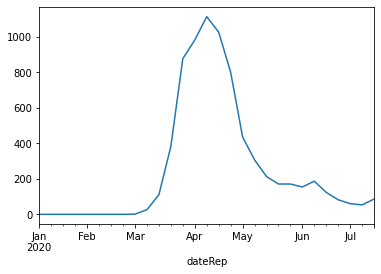

In [143]:
df_NL['Cases'].resample('W').mean().plot()

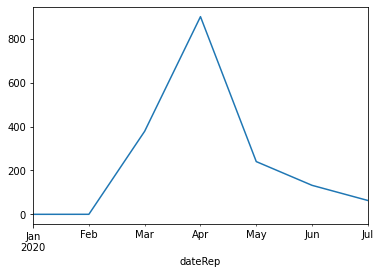

In [144]:
df_NL['Cases'].resample('M').mean().plot()

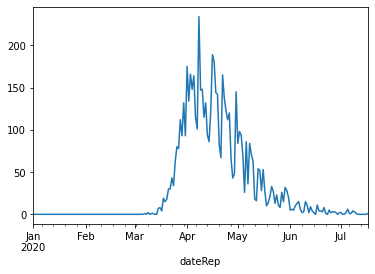

In [145]:
df_NL['Deaths'].resample('D').mean().plot()

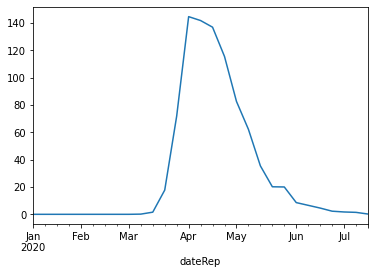

In [146]:
df_NL['Deaths'].resample('W').mean().plot()

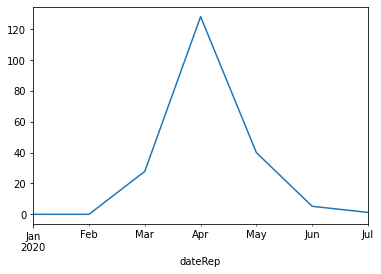

In [147]:
df_NL['Deaths'].resample('M').mean().plot()

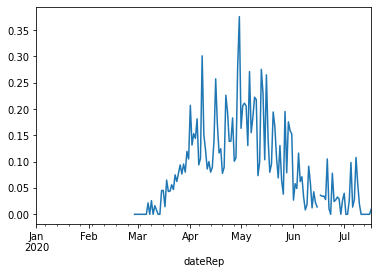

In [148]:
df_NL['Case_Fatality_Ratio'].resample('D').mean().plot()

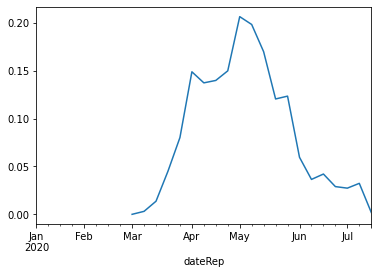

In [149]:
df_NL['Case_Fatality_Ratio'].resample('W').mean().plot()

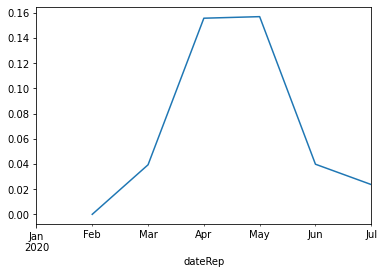

In [150]:
df_NL['Case_Fatality_Ratio'].resample('M').mean().plot()

## March Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37bf1cd4a8>,
      dtype=object)

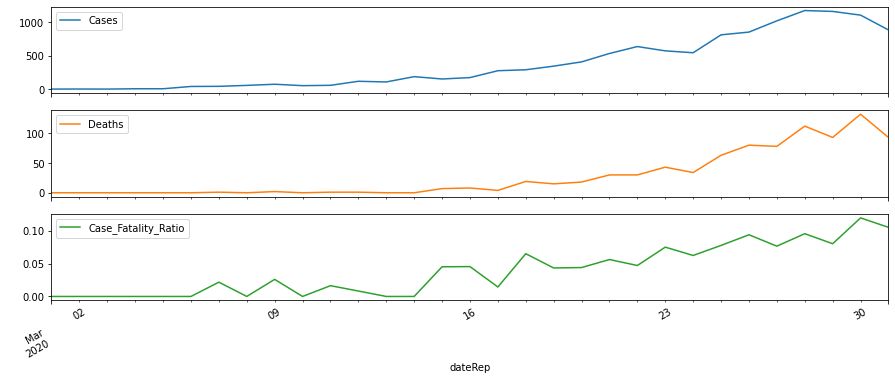

In [151]:
df_NL['2020-03'].plot(subplots=True, figsize=(15,6))

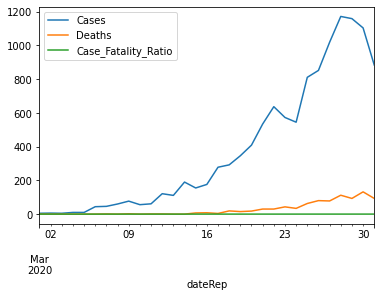

In [152]:
df_NL['2020-03'].resample('D').mean().plot()

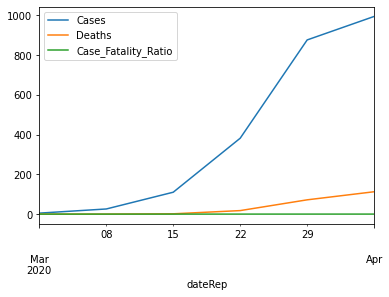

In [153]:
df_NL['2020-03'].resample('W').mean().plot()

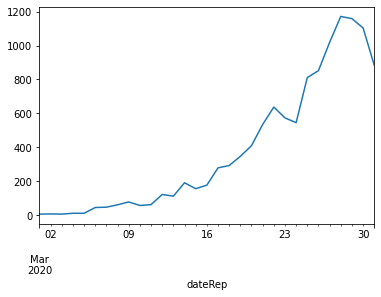

In [154]:
df_NL.Cases['2020-03'].resample('D').mean().plot()

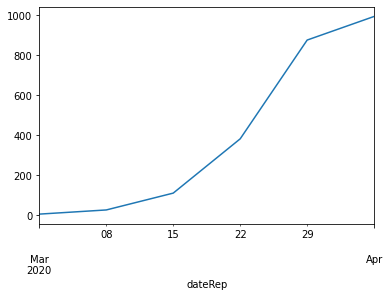

In [155]:
df_NL.Cases['2020-03'].resample('W').mean().plot()

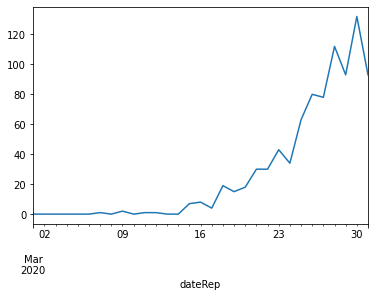

In [156]:
df_NL.Deaths['2020-03'].resample('D').mean().plot()

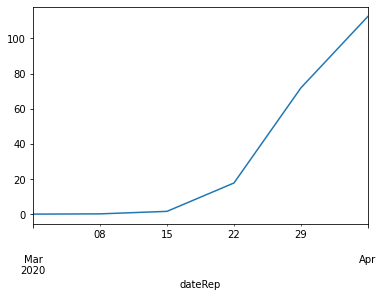

In [157]:
df_NL.Deaths['2020-03'].resample('W').mean().plot()

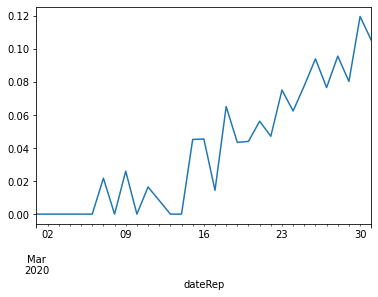

In [158]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('D').mean().plot()

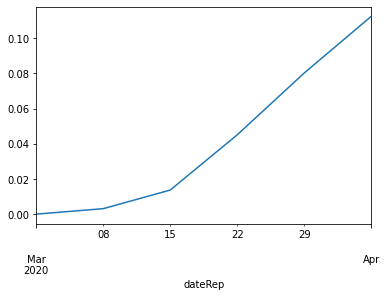

In [159]:
df_NL.Case_Fatality_Ratio['2020-03'].resample('W').mean().plot()

## April Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37becf18d0>,
      dtype=object)

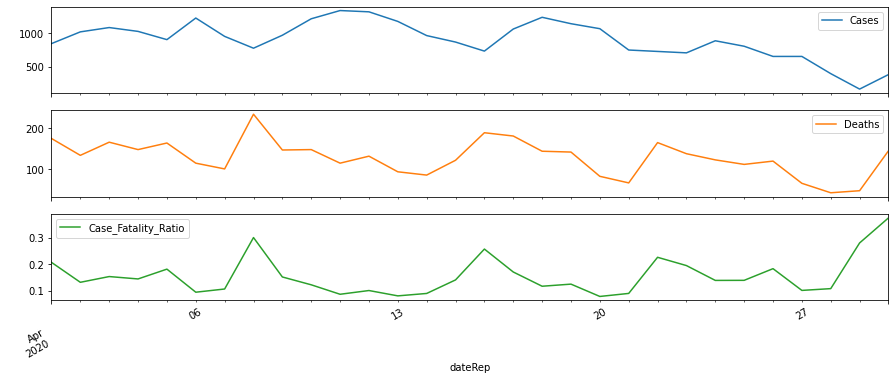

In [160]:
df_NL['2020-04'].plot(subplots=True, figsize=(15,6))

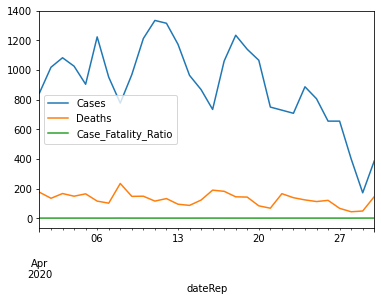

In [161]:
df_NL['2020-04'].resample('D').mean().plot()

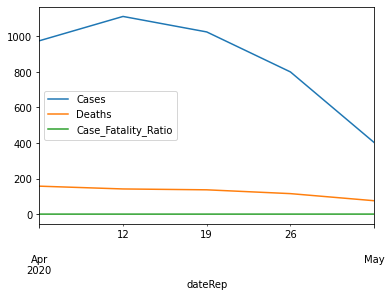

In [162]:
df_NL['2020-04'].resample('W').mean().plot()

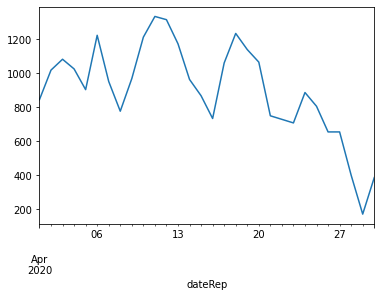

In [163]:
df_NL.Cases['2020-04'].resample('D').mean().plot()

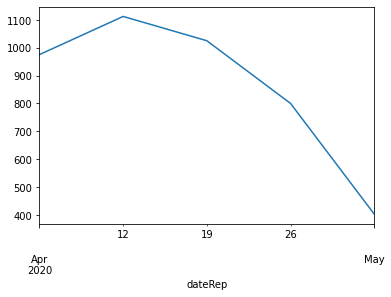

In [164]:
df_NL.Cases['2020-04'].resample('W').mean().plot()

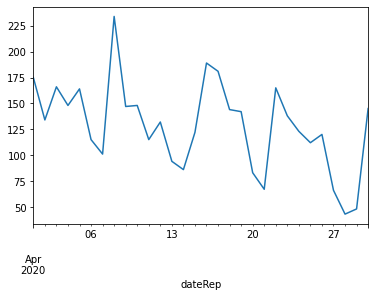

In [165]:
df_NL.Deaths['2020-04'].resample('D').mean().plot()

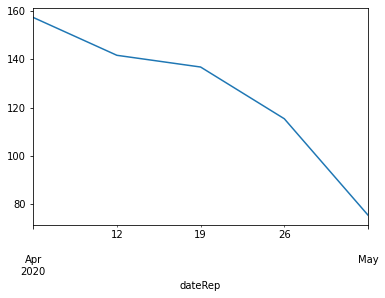

In [166]:
df_NL.Deaths['2020-04'].resample('W').mean().plot()

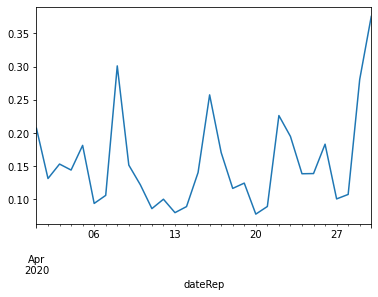

In [167]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('D').mean().plot()

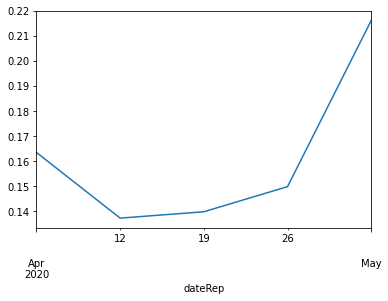

In [168]:
df_NL.Case_Fatality_Ratio['2020-04'].resample('W').mean().plot()

## May Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37be5ff080>,
      dtype=object)

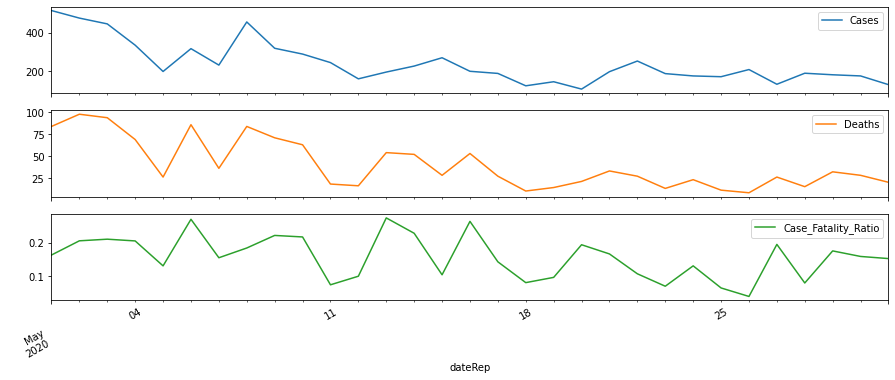

In [169]:
df_NL['2020-05'].plot(subplots=True, figsize=(15,6))

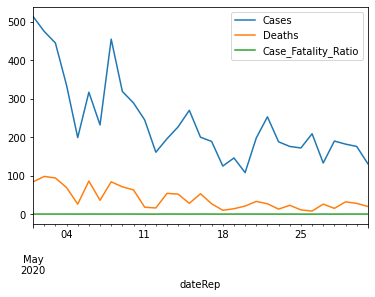

In [170]:
df_NL['2020-05'].resample('D').mean().plot()

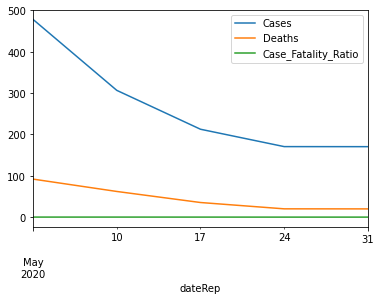

In [171]:
df_NL['2020-05'].resample('W').mean().plot()

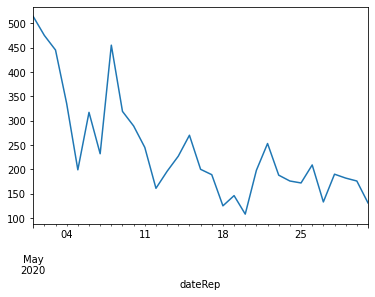

In [172]:
df_NL.Cases['2020-05'].resample('D').mean().plot()

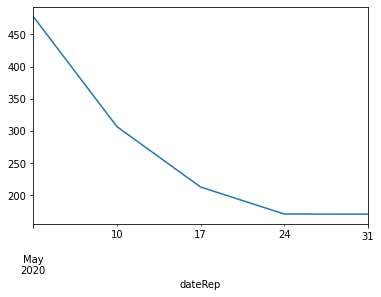

In [173]:
df_NL.Cases['2020-05'].resample('W').mean().plot()

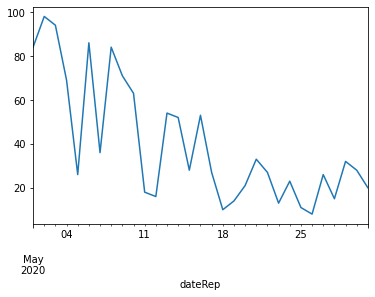

In [174]:
df_NL.Deaths['2020-05'].resample('D').mean().plot()

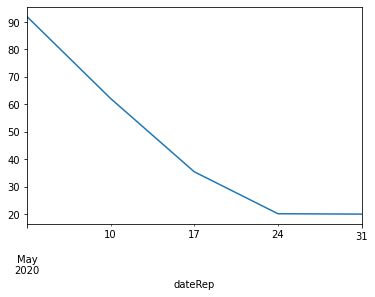

In [175]:
df_NL.Deaths['2020-05'].resample('W').mean().plot()

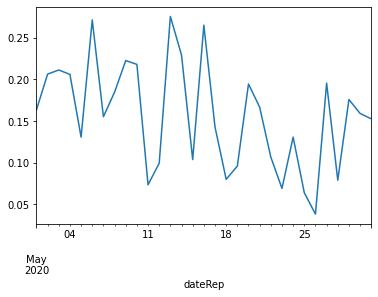

In [176]:
df_NL.Case_Fatality_Ratio['2020-05'].resample('D').mean().plot()

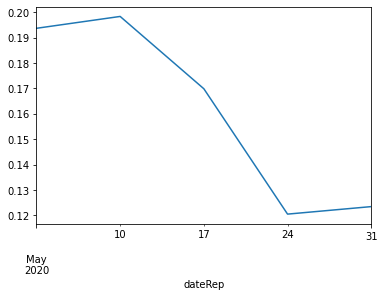

In [177]:
df_NL.Case_Fatality_Ratio['2020-05'].resample('W').mean().plot()

## June Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37c0139ba8>,
      dtype=object)

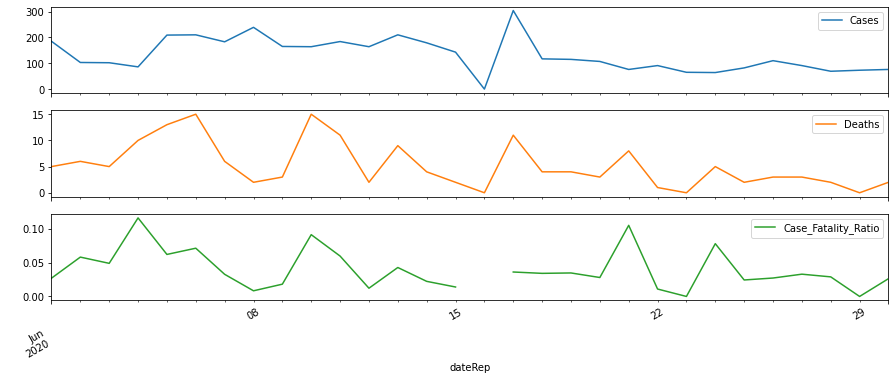

In [178]:
df_NL['2020-06'].plot(subplots=True, figsize=(15,6))

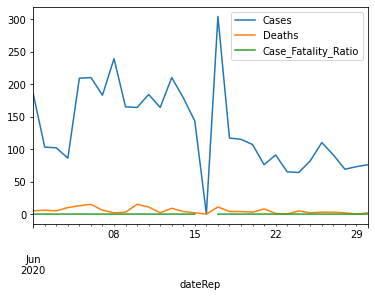

In [179]:
df_NL['2020-06'].resample('D').mean().plot()

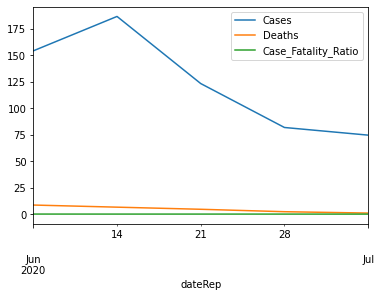

In [180]:
df_NL['2020-06'].resample('W').mean().plot()

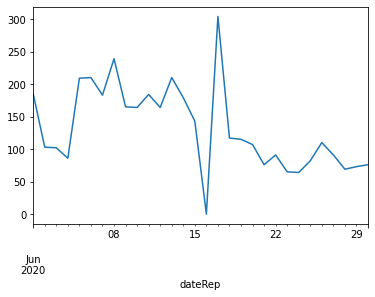

In [181]:
df_NL.Cases['2020-06'].resample('D').mean().plot()

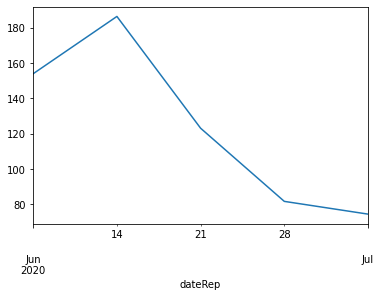

In [182]:
df_NL.Cases['2020-06'].resample('W').mean().plot()

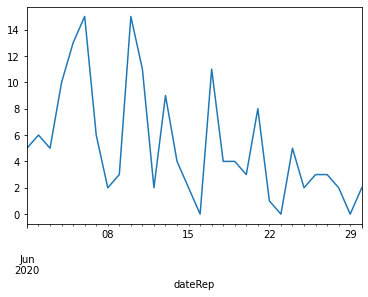

In [183]:
df_NL.Deaths['2020-06'].resample('D').mean().plot()

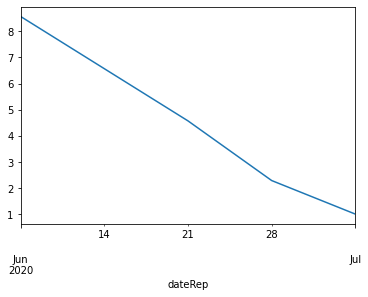

In [184]:
df_NL.Deaths['2020-06'].resample('W').mean().plot()

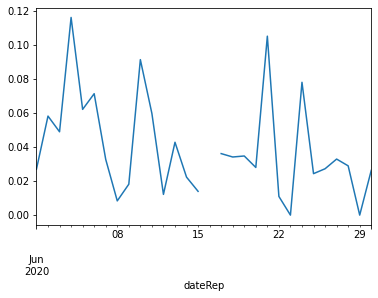

In [185]:
df_NL.Case_Fatality_Ratio['2020-06'].resample('D').mean().plot()

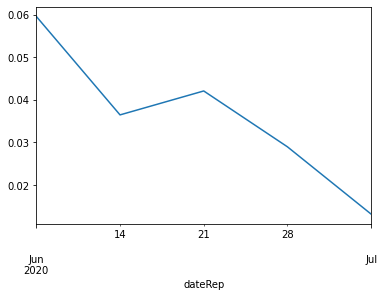

In [186]:
df_NL.Case_Fatality_Ratio['2020-06'].resample('W').mean().plot()

## July Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f37bfb88f28>,
      dtype=object)

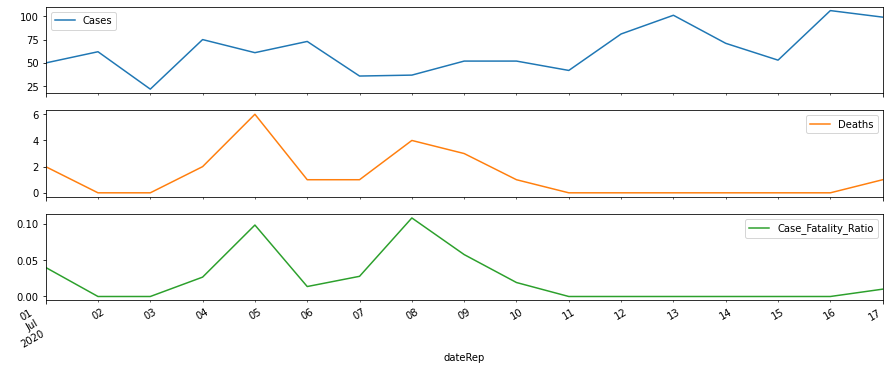

In [187]:
df_NL['2020-07'].plot(subplots=True, figsize=(15,6))

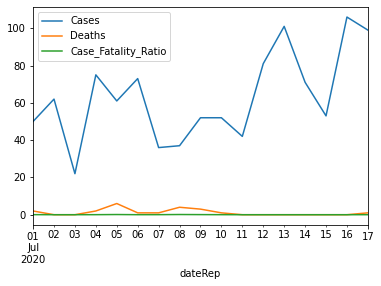

In [188]:
df_NL['2020-07'].resample('D').mean().plot()

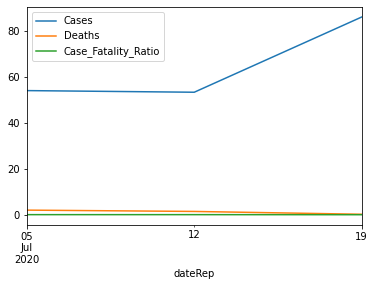

In [189]:
df_NL['2020-07'].resample('W').mean().plot()

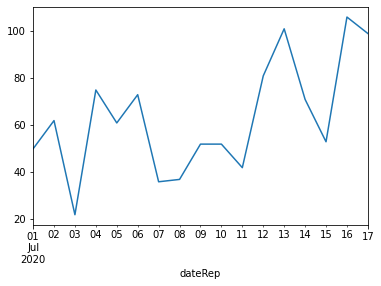

In [190]:
df_NL.Cases['2020-07'].resample('D').mean().plot()

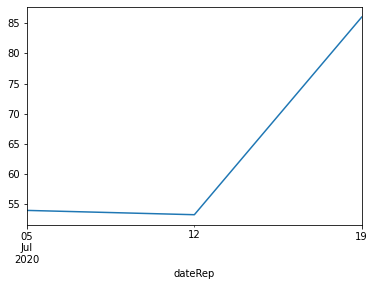

In [191]:
df_NL.Cases['2020-07'].resample('W').mean().plot()

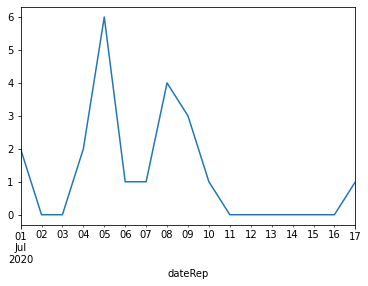

In [192]:
df_NL.Deaths['2020-07'].resample('D').mean().plot()

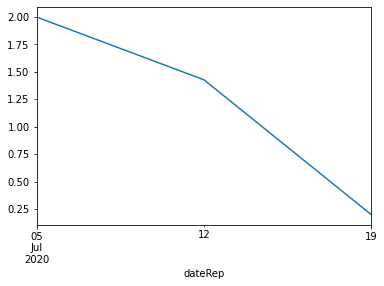

In [193]:
df_NL.Deaths['2020-07'].resample('W').mean().plot()

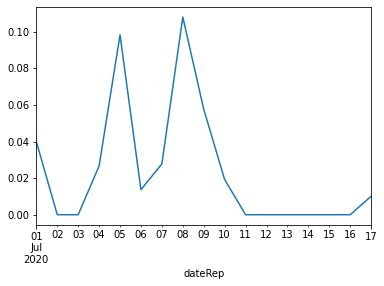

In [194]:
df_NL.Case_Fatality_Ratio['2020-07'].resample('D').mean().plot()

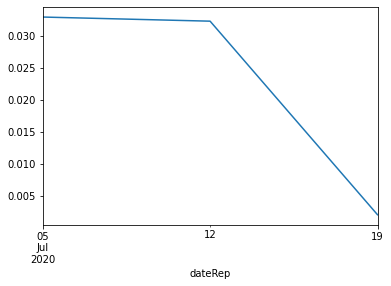

In [195]:
df_NL.Case_Fatality_Ratio['2020-07'].resample('W').mean().plot()